In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\ashwi\Desktop\practice\startup_funding.csv", encoding="utf-8")

# Quick look
print(df.head())
print(df.info())


   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growt

In [4]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicate rows
print("Duplicates:", df.duplicated().sum())

# Unique values in key categorical columns
print(df['Industry Vertical'].unique()[:10])

# Data types
print(df.dtypes)


Missing values:
 Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64
Duplicates: 0
['E-Tech' 'Transportation' 'E-commerce' 'FinTech' 'Fashion and Apparel'
 'Logistics' 'Hospitality' 'Technology' 'E-Commerce' 'Aerospace']
Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [14]:
# Standardize column names (remove spaces + lowercase)
df.columns = df.columns.str.strip().str.replace("\xa0", " ").str.lower()

print(df.columns)  # check actual names


# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove commas and convert to numeric
df['amount in usd'] = (
    df['amount in usd']
    .astype(str)                 # ensure string for replacement
    .str.replace(",", "")        # remove commas
    .str.replace("Undisclosed", "") # handle text values
    .str.replace("N/A", "")
)

df['amount in usd'] = pd.to_numeric(
    df['amount in usd'].astype(str).str.replace(",", "").str.replace("Undisclosed", "").str.replace("N/A", ""),
    errors="coerce"
)

df['amount in usd'] = df['amount in usd'].fillna(df['amount in usd'].median())
df['industry vertical'] = df['industry vertical'].fillna("Unknown")


# Clean startup names (strip spaces + title case)
df['startup name'] = df['startup name'].str.strip().str.title()

# Convert 'Date' to datetime
df['date dd/mm/yyyy'] = pd.to_datetime(df['date dd/mm/yyyy'], errors='coerce')


Index(['sr no', 'date dd/mm/yyyy', 'startup name', 'industry vertical',
       'subvertical', 'city  location', 'investors name', 'investmentntype',
       'amount in usd', 'remarks'],
      dtype='object')


In [16]:
# Top 10 sectors by count
print(df['industry vertical'].value_counts().head(10))

# Top funded startups
print(df.groupby('startup name')['amount in usd'].sum().sort_values(ascending=False).head(10))

# Funding trend over years
print(df.groupby(df['date dd/mm/yyyy'].dt.year)['amount in usd'].sum())


industry vertical
Consumer Internet    941
Technology           478
eCommerce            186
Unknown              171
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Name: count, dtype: int64
startup name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.152350e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Flipkart.Com        7.000000e+08
Snapdeal            7.000000e+08
Ola Cabs            6.714000e+08
Oyo Rooms           6.350000e+08
True North          6.000000e+08
Name: amount in usd, dtype: float64
date dd/mm/yyyy
2015.0    3.791210e+09
2016.0    1.803365e+09
2017.0    4.870802e+09
2018.0    2.336848e+09
2019.0    2.859198e+09
2020.0    3.731589e+08
Name: amount in usd, dtype: float64


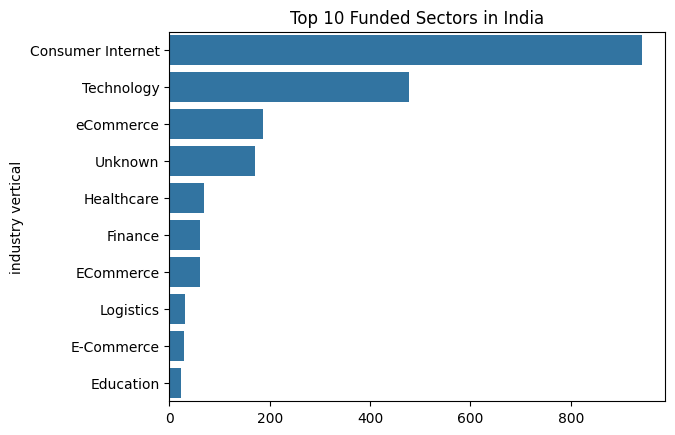

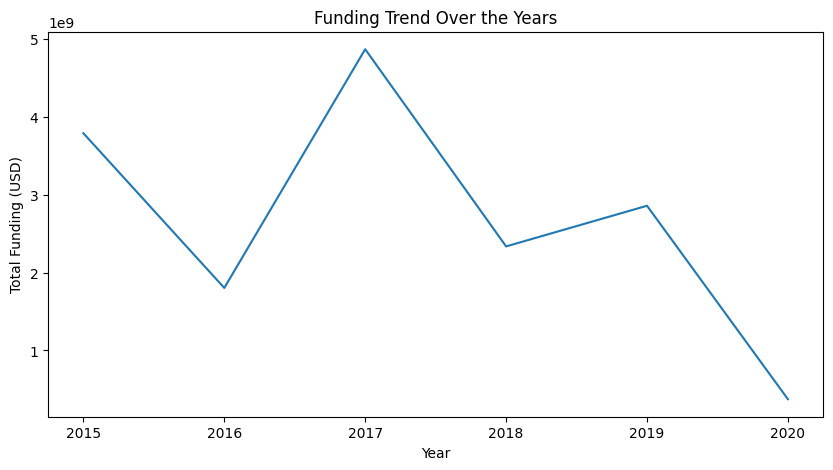

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 funded sectors
top_sectors = df['industry vertical'].value_counts().head(10)
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Funded Sectors in India")
plt.show()

# Funding trend over years
df.groupby(df['date dd/mm/yyyy'].dt.year)['amount in usd'].sum().plot(kind='line', figsize=(10,5))
plt.title("Funding Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.show()
